In [67]:
#Unsupervised Learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from sklearn.cluster import \
(KMeans,
AgglomerativeClustering)
from scipy.cluster.hierarchy import \
(dendrogram,
cut_tree)
from ISLP.cluster import compute_linkage
from sklearn.metrics import pairwise_distances

In [ ]:
#12.5.1 Principal Components Analysis

In [2]:
USArrests = get_rdataset('USArrests').data
USArrests

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [3]:
USArrests.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [4]:
USArrests.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [5]:
USArrests.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [6]:
#Scaling the Variables
scaler = StandardScaler(with_std=True,
                        with_mean=True)
USArrests_scaled = scaler.fit_transform(USArrests)

In [7]:
#perform principal components analysis
pcaUS = PCA()
pcaUS.fit(USArrests_scaled)
pcaUS.mean_

array([-7.10542736e-17,  1.38777878e-16, -4.39648318e-16,  8.59312621e-16])

In [8]:
scores = pcaUS.transform(USArrests_scaled)

In [9]:
#corresponding principal component loading vector
pcaUS.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [-0.6492278 ,  0.74340748, -0.13387773, -0.08902432]])

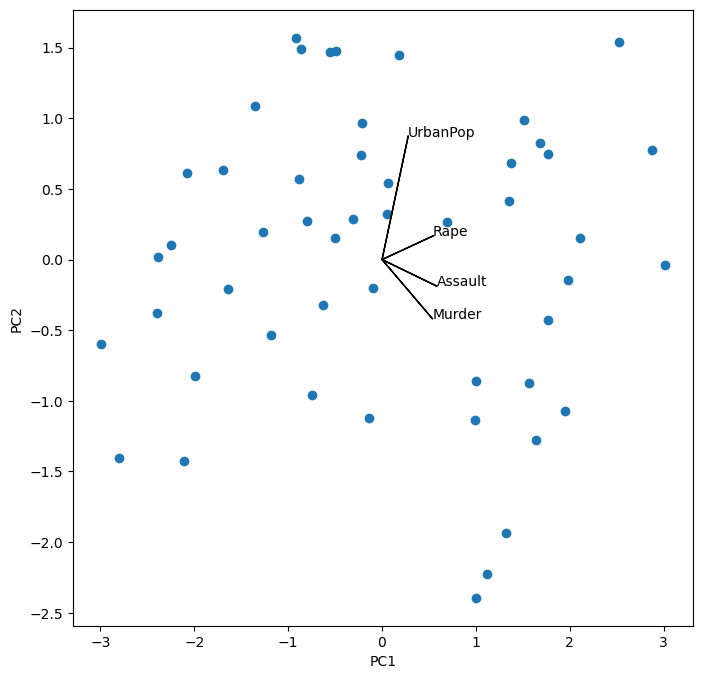

In [10]:
i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape[1]):
    ax.arrow(0, 0, pcaUS.components_[i,k], pcaUS.components_[j,k])
    ax.text(pcaUS.components_[i,k],
            pcaUS.components_[j,k],
            USArrests.columns[k])

In [ ]:
#fipping the signs of the second set of scores and loadings
#principal components are only unique up to a sign change,

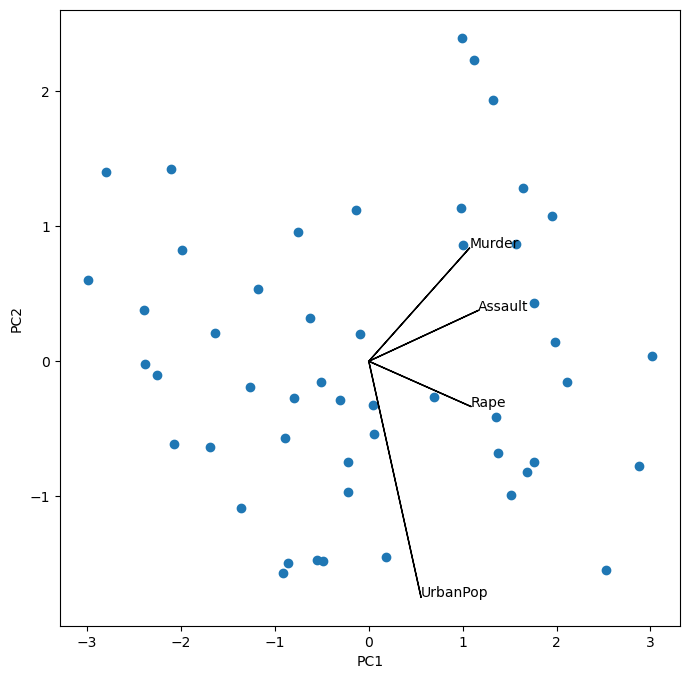

In [11]:
scale_arrow = s_ = 2
scores[:,1] *= -1
pcaUS.components_[1] *= -1 # flip the y-axis
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape[1]):
    ax.arrow(0, 0, s_*pcaUS.components_[i,k], s_*pcaUS.components_[j,k])
    ax.text(s_*pcaUS.components_[i,k],
            s_*pcaUS.components_[j,k],
            USArrests.columns[k])

In [12]:
pcaUS.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [13]:
#PVE
pcaUS.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [ ]:
#first principal component explains 62.0% of the variance in the data, the next principal component explains 24.7% of the variance

In [14]:
%%capture
#plot the proportion of variance explained
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pcaUS.n_components_)+1
ax = axes[0]
ax.plot(ticks,
        pcaUS.explained_variance_ratio_,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

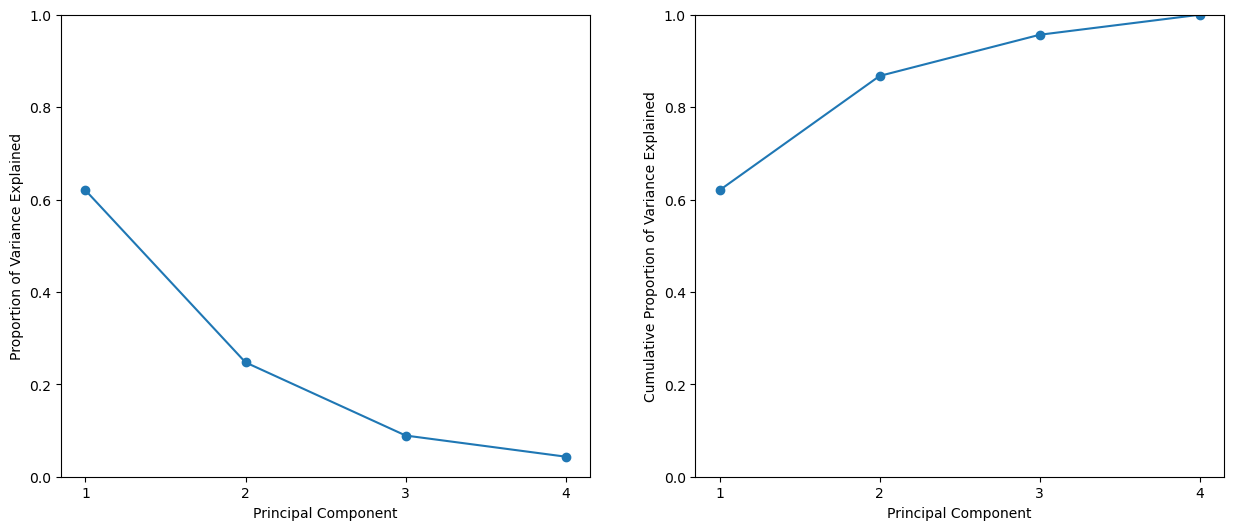

In [15]:
ax = axes[1]
ax.plot(ticks,
        pcaUS.explained_variance_ratio_.cumsum(),
        marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

In [16]:
#computes the cumulative sum of the elements of a numeric vector
a = np.array([1,2,8,-3])
np.cumsum(a)

array([ 1,  3, 11,  8])

In [ ]:
#12.5.2 Matrix Completion

In [17]:
#U corresponds to a standardized version of the PCA score matrix
X = USArrests_scaled
U, D, V = np.linalg.svd(X, full_matrices=False)
U.shape, D.shape, V.shape

((50, 4), (4,), (4, 4))

In [ ]:
#If we multiply each column of U by the corresponding element of D, we recover the PCA scores exactly (up to a meaningless sign fip).

In [18]:
(U * D[None,:])[:3]

array([[-0.98556588, -1.13339238,  0.44426879,  0.15626714],
       [-1.95013775, -1.07321326, -2.04000333, -0.43858344],
       [-1.76316354,  0.74595678, -0.05478082, -0.83465292]])

In [19]:
scores[:3]

array([[ 0.98556588,  1.13339238, -0.44426879, -0.15626714],
       [ 1.95013775,  1.07321326,  2.04000333,  0.43858344],
       [ 1.76316354, -0.74595678,  0.05478082,  0.83465292]])

In [20]:
#omit 20 entries in the 50 × 4 data matrix at random
n_omit = 20
np.random.seed(15)
r_idx = np.random.choice(np.arange(X.shape[0]),
                         n_omit,
                         replace=False)
c_idx = np.random.choice(np.arange(X.shape[1]),
                         n_omit,
                         replace=True)
Xna = X.copy()
Xna[r_idx, c_idx] = np.nan

In [21]:
# Step 2 of Algorithm 12.1
def low_rank(X, M=1):
    U, D, V = np.linalg.svd(X)
    L = U[:,:M] * D[None,:M]
    return L.dot(V[:M])

In [22]:
#conduct Step 1 of the algorithm
Xhat = Xna.copy()
Xbar = np.nanmean(Xhat, axis=0)
Xhat[r_idx, c_idx] = Xbar[c_idx]

In [23]:
# set ourselves up to measure the progress of our iterations:
thresh = 1e-7
rel_err = 1
count = 0
ismiss = np.isnan(Xna) #ismiss is a logical matrix with the same dimensions as Xna
mssold = np.mean(Xhat[~ismiss]**2)   
mss0 = np.mean(Xna[~ismiss]**2)
# store the mean squared error of the non-missing elements of the current version of Xhat in mss,
# and will then iterate Step 2 of Algorithm 12.1 until the relative error, defned as (mssold - mss) / mss0, falls below thresh = 1e-7

In [24]:
#approximate Xhat using low_rank()
while rel_err > thresh:
    count += 1
    Xapp = low_rank(Xhat, M=1) #Step 2(a)
    Xhat[ismiss] = Xapp[ismiss] # Step 2(b)
    mss = np.mean(((Xna - Xapp)[~ismiss])**2) # Step 2(c)
    rel_err = (mssold - mss) / mss0
    mssold = mss
    print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}"
          .format(count, mss, rel_err))

Iteration: 1, MSS:0.395, Rel.Err 5.99e-01
Iteration: 2, MSS:0.382, Rel.Err 1.33e-02
Iteration: 3, MSS:0.381, Rel.Err 1.44e-03
Iteration: 4, MSS:0.381, Rel.Err 1.79e-04
Iteration: 5, MSS:0.381, Rel.Err 2.58e-05
Iteration: 6, MSS:0.381, Rel.Err 4.22e-06
Iteration: 7, MSS:0.381, Rel.Err 7.65e-07
Iteration: 8, MSS:0.381, Rel.Err 1.48e-07
Iteration: 9, MSS:0.381, Rel.Err 2.95e-08


In [ ]:
#the relative error has fallen below thresh = 1e-7, and so the algorithm terminates. mean squared error of the non-missing elements equals 0.381

In [25]:
#finanlly compute the correlation between the 20 imputed values and the actual values
np.corrcoef(Xapp[ismiss], X[ismiss])[0,1]

0.711356743429736

In [26]:
#K-Means Clustering
#the first 25 observations have a mean shift relative to the next 25 observations.
np.random.seed(0);
X = np.random.standard_normal((50,2));
X[:25,0] += 3;
X[:25,1] -= 4;

In [27]:
#perform K-means clustering with K = 2
kmeans = KMeans(n_clusters=2,
                random_state=2,
                n_init=20).fit(X)

In [28]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

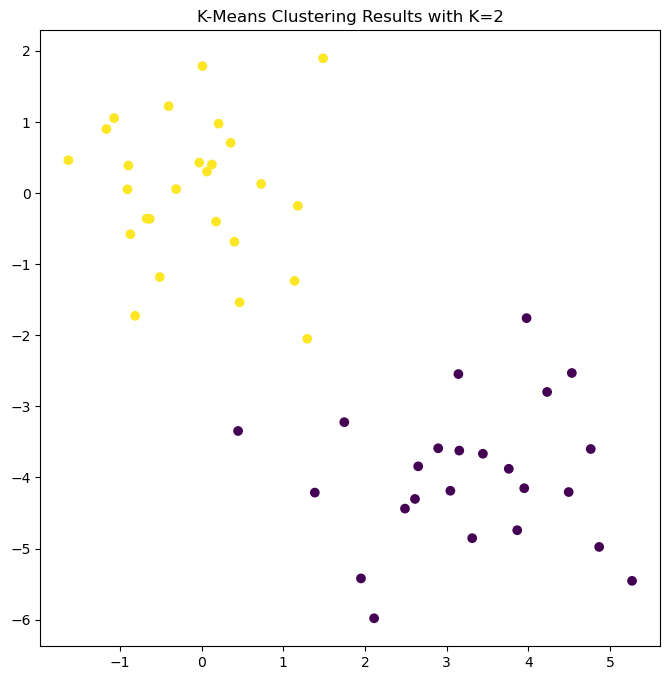

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2");

In [ ]:
#However, for real data, we do not know the true number of clusters, nor whether they exist in any precise way.
#performed K-means clustering on this example with K = 3.

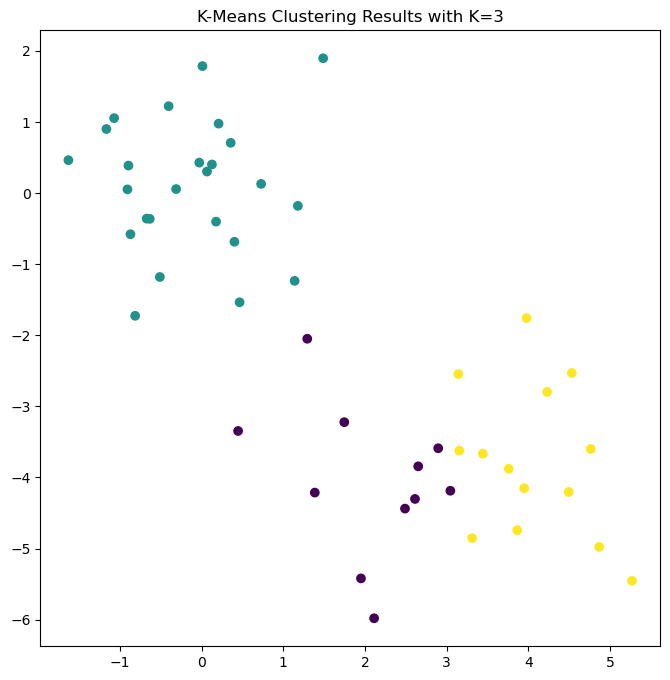

In [31]:
kmeans = KMeans(n_clusters=3,
                random_state=3,
                n_init=20).fit(X) #the default is 10
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=3");

In [32]:
kmeans1 = KMeans(n_clusters=3,
                 random_state=3,
                 n_init=1).fit(X)
kmeans20 = KMeans(n_clusters=3,
                  random_state=3,
                  n_init=20).fit(X);
kmeans1.inertia_, kmeans20.inertia_

(76.85131986999252, 75.06261242745384)

In [ ]:
#kmeans.inertia_ is the total within-cluster sum of squares, which we seek to minimize by performing K-means clustering

In [ ]:
#a large value of n_init

In [ ]:
#####
#Hierarchical Clustering

In [33]:
#using complete linkage.
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete')
hc_comp.fit(X)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

In [34]:
#This computes the entire dendrogram. We could just as easily perform hierarchical clustering 
#with average or single linkage instead:
hc_avg = HClust(distance_threshold=0,
                n_clusters=None,
                linkage='average');
hc_avg.fit(X)
hc_sing = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='single');
hc_sing.fit(X);

In [35]:
D = np.zeros((X.shape[0], X.shape[0]));
for i in range(X.shape[0]):
    x_ = np.multiply.outer(np.ones(X.shape[0]), X[i])
    D[i] = np.sqrt(np.sum((X - x_)**2, 1));
hc_sing_pre = HClust(distance_threshold=0,
                     n_clusters=None,
                     metric='precomputed',
                     linkage='single')
hc_sing_pre.fit(D)

AgglomerativeClustering(distance_threshold=0, linkage='single',
                        metric='precomputed', n_clusters=None)

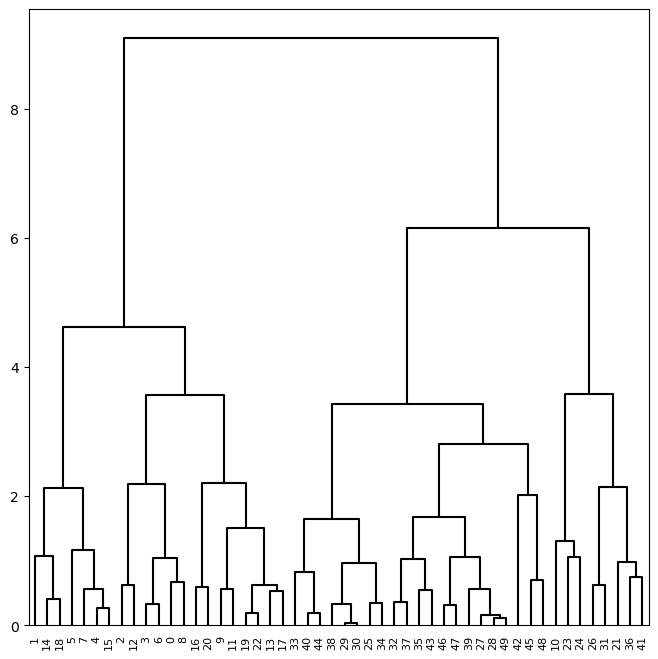

In [37]:
#store these values in a dictionary cargs
cargs = {'color_threshold':-np.inf,
         'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           **cargs);

In [ ]:
#cut the tree at a height of 4, coloring links that merge above 4 in black

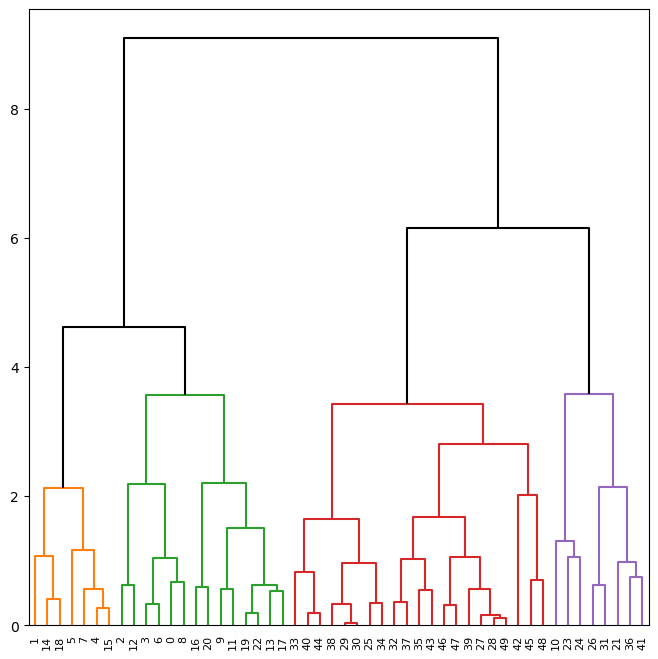

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           color_threshold=4,
           above_threshold_color='black');

In [39]:
cut_tree(linkage_comp, n_clusters=4).T

array([[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2,
        0, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3,
        3, 3, 3, 3, 3, 3]])

In [40]:
cut_tree(linkage_comp, height=5)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2]])

In [ ]:
#scale the variables before performing hierarchical clustering

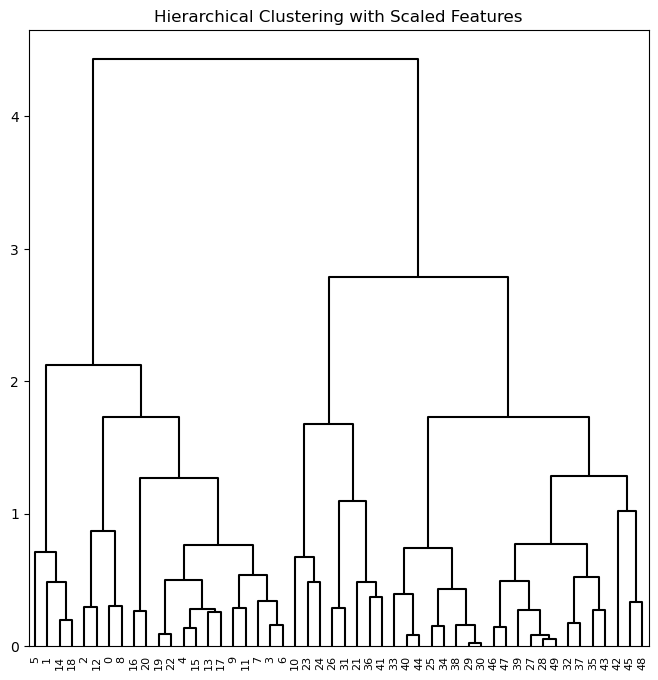

In [41]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
hc_comp_scale = HClust(distance_threshold=0,
                       n_clusters=None,
                       linkage='complete').fit(X_scale)
linkage_comp_scale = compute_linkage(hc_comp_scale)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp_scale , ax=ax, **cargs)
ax.set_title("Hierarchical Clustering with Scaled Features");

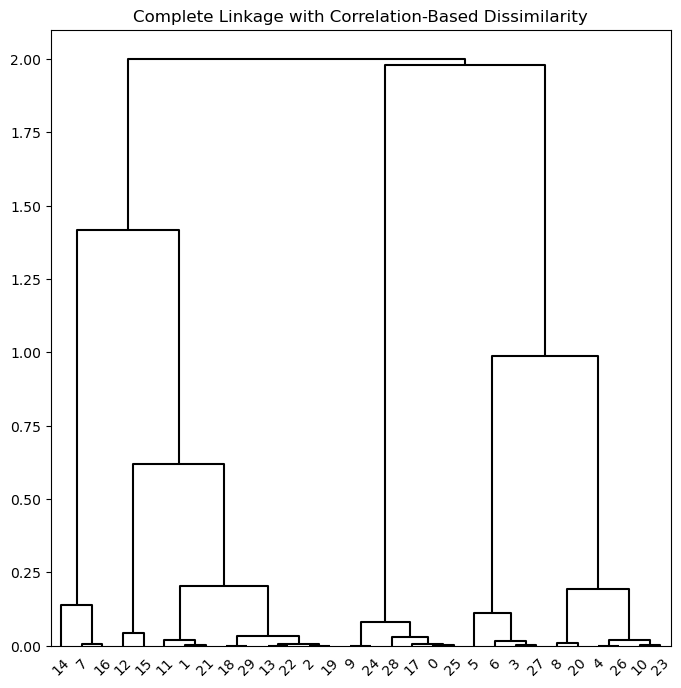

In [42]:
#correlation only makes sense for data with at least three features
X = np.random.standard_normal((30, 3))
corD = 1 - np.corrcoef(X)
hc_cor = HClust(linkage='complete',
                distance_threshold=0,
                n_clusters=None,
                metric='precomputed')
hc_cor.fit(corD)
linkage_cor = compute_linkage(hc_cor)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_cor , ax=ax, **cargs)
ax.set_title("Complete Linkage with Correlation-Based Dissimilarity");

In [ ]:
###############NCI60 Data Example

In [43]:
NCI60 = load_data('NCI60')
nci_labs = NCI60['labels']
nci_data = NCI60['data']

In [44]:
nci_data.shape

(64, 6830)

In [ ]:
#PCA on the NCI60 Data

In [45]:
#perform PCA on the data after scaling the variables (genes) to have standard deviation one,
scaler = StandardScaler()
nci_scaled = scaler.fit_transform(nci_data)
nci_pca = PCA()
nci_scores = nci_pca.fit_transform(nci_scaled)

In [ ]:
#plot the first few principal component score vectors

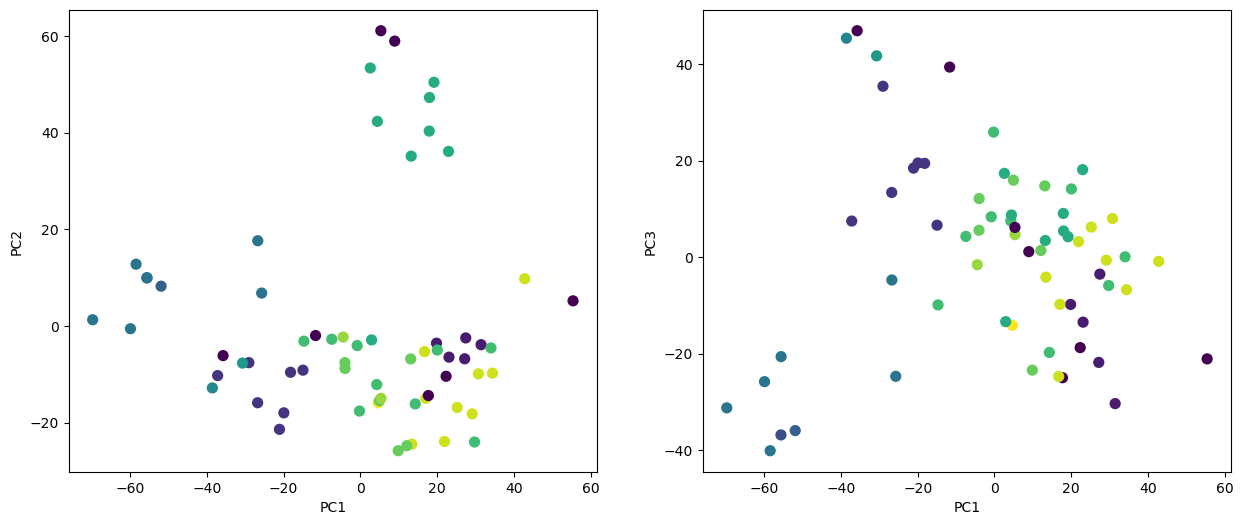

In [46]:
cancer_types = list(np.unique(nci_labs))
nci_groups = np.array([cancer_types.index(lab)
                       for lab in nci_labs.values])
fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax = axes[0]
ax.scatter(nci_scores[:,0],
           nci_scores[:,1],
           c=nci_groups,
           marker='o',
           s=50)
ax.set_xlabel('PC1'); ax.set_ylabel('PC2')
ax = axes[1]
ax.scatter(nci_scores[:,0],
           nci_scores[:,2],
           c=nci_groups,
           marker='o',
           s=50)
ax.set_xlabel('PC1'); ax.set_ylabel('PC3');

In [ ]:
#plot the percent variance explained by the principal components as well as the cumulative percent variance explained.

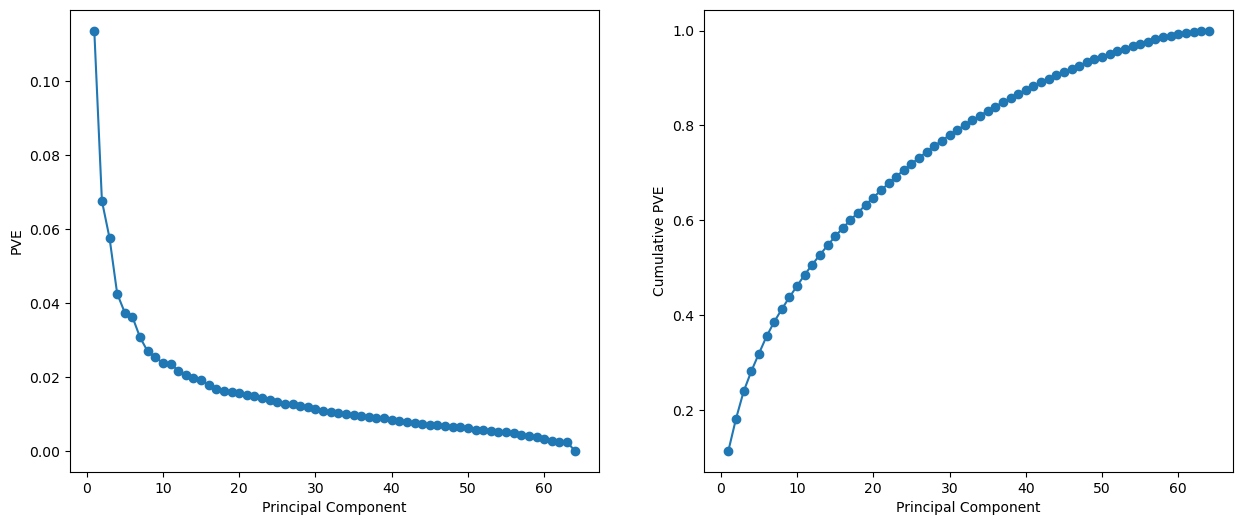

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax = axes[0]
ticks = np.arange(nci_pca.n_components_)+1
ax.plot(ticks,
        nci_pca.explained_variance_ratio_,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('PVE')
ax = axes[1]
ax.plot(ticks,
        nci_pca.explained_variance_ratio_.cumsum(),
        marker='o');
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative PVE');

In [ ]:
#the first seven principal components explain around 40% of the variance in the data
#there is an elbow in the plot after approximately the seventh principal component.

In [ ]:
#Clustering the Observations of the NCI60 Data
#using complete, single, and average linkage

In [49]:
#We first write a short function to produce the three dendrograms.
def plot_nci(linkage , ax, cut=-np.inf):
    cargs = {'above_threshold_color':'black',
             'color_threshold':cut}
    hc = HClust(n_clusters=None,
                distance_threshold=0,
                linkage=linkage.lower()).fit(nci_scaled)
    linkage_ = compute_linkage(hc)
    dendrogram(linkage_,
               ax=ax,
               labels=np.asarray(nci_labs),
               leaf_font_size=10,
               **cargs)
    ax.set_title('%s Linkage' % linkage)
    return hc

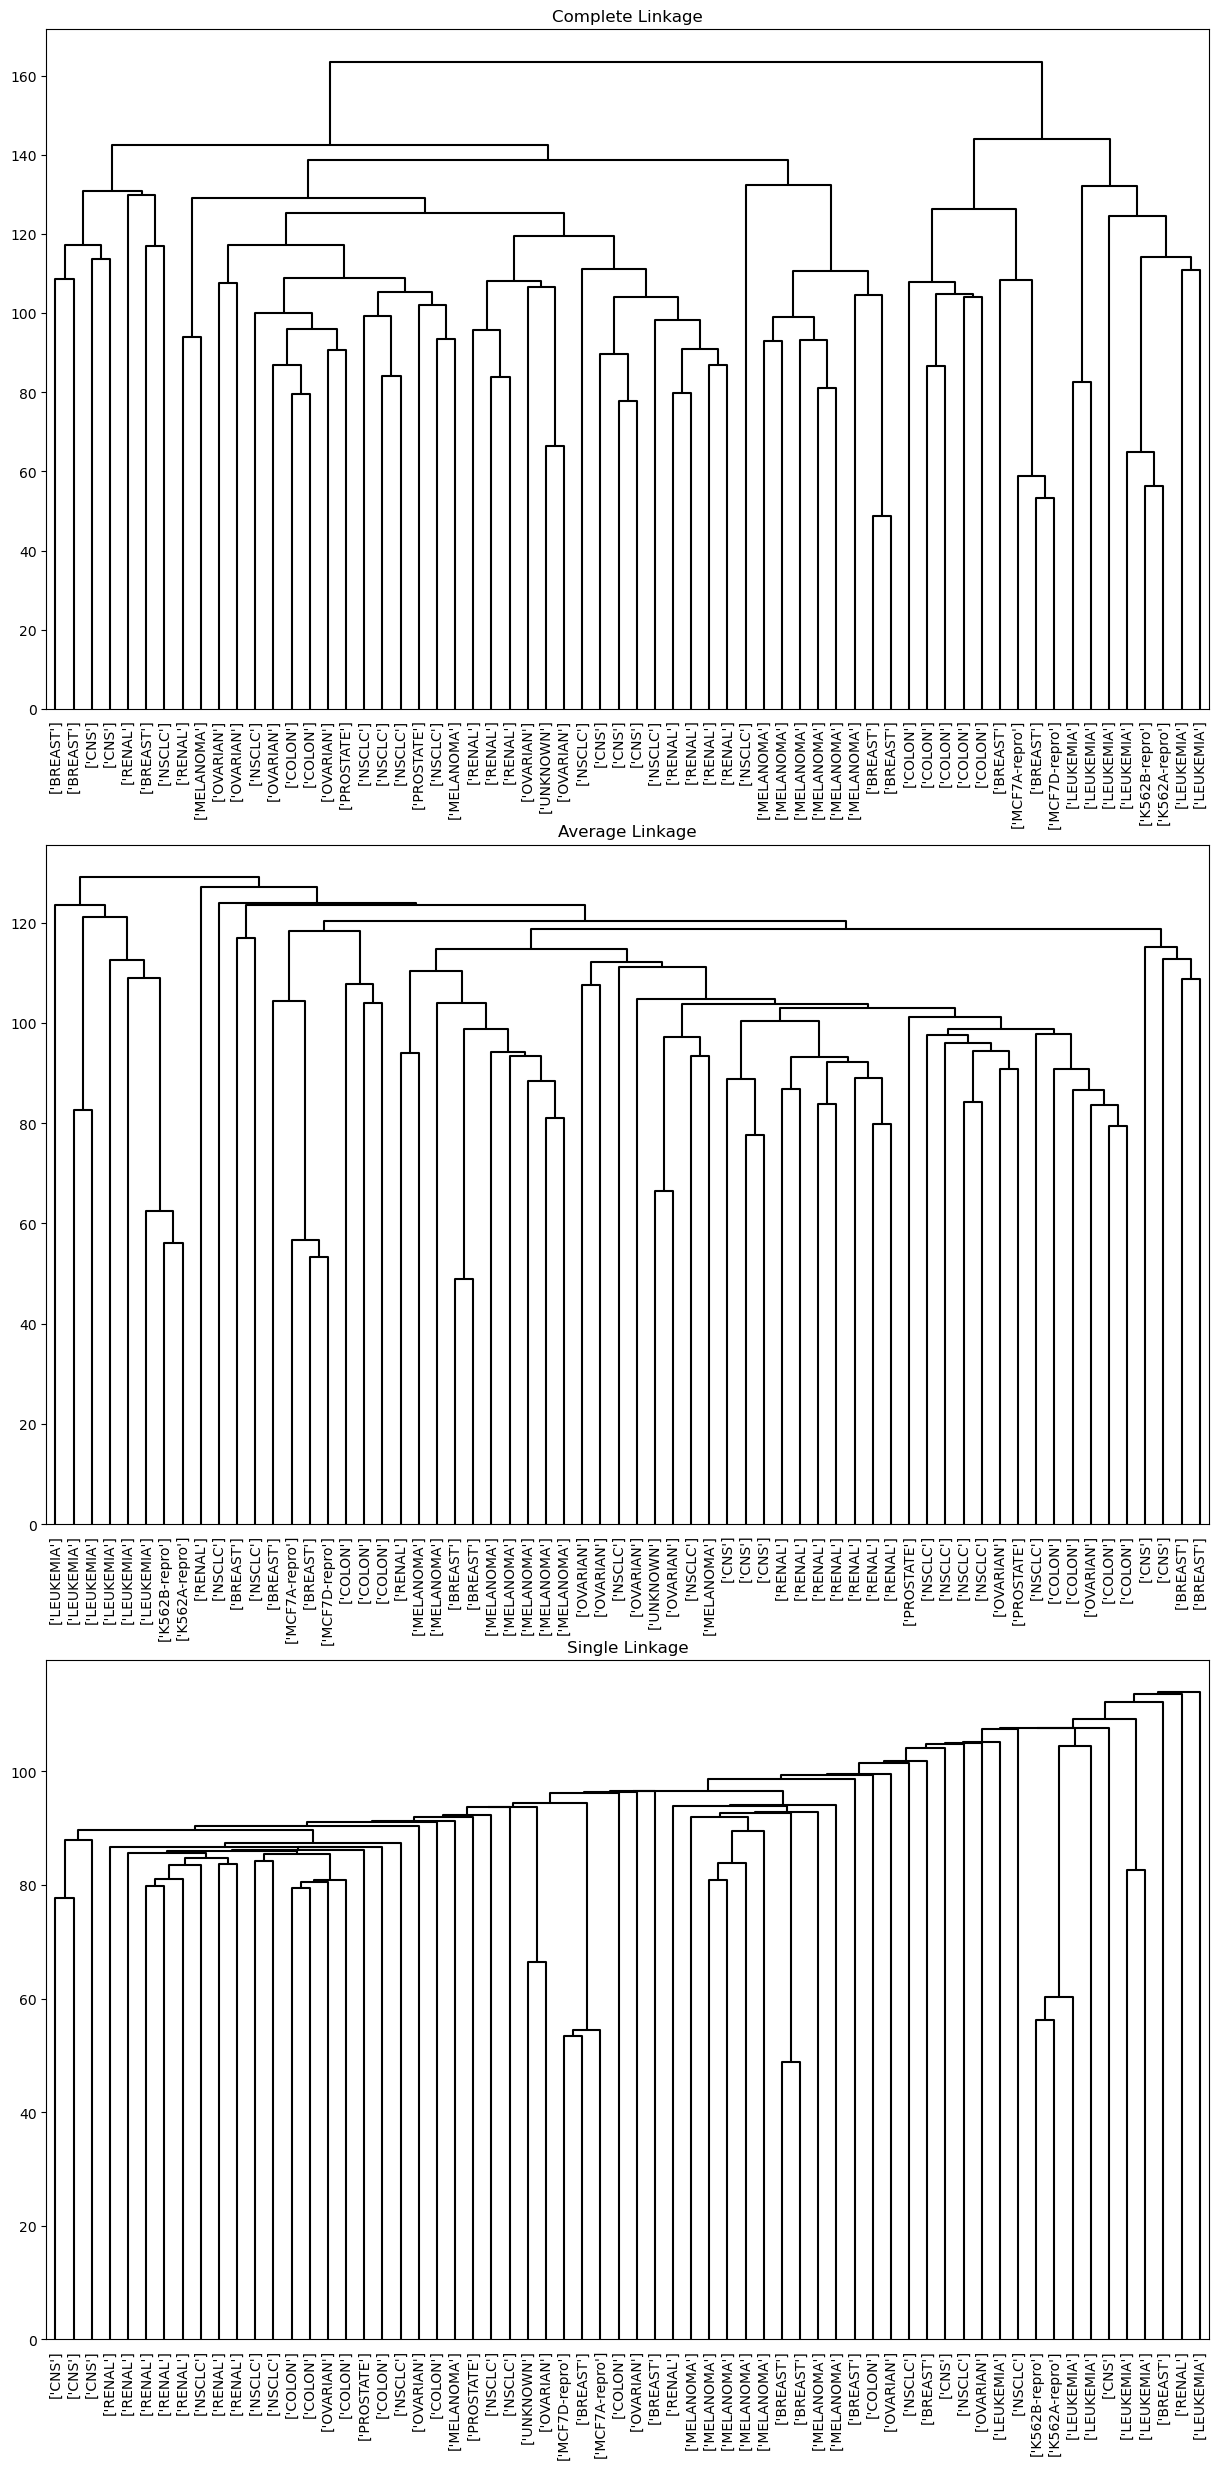

In [50]:
fig, axes = plt.subplots(3, 1, figsize=(15,30))
ax = axes[0]; hc_comp = plot_nci('Complete', ax)
ax = axes[1]; hc_avg = plot_nci('Average', ax)
ax = axes[2]; hc_sing = plot_nci('Single', ax)

In [51]:
# cut the dendrogram at the height that will yield a particular number of clusters, say four:
linkage_comp = compute_linkage(hc_comp)
comp_cut = cut_tree(linkage_comp , n_clusters=4).reshape(-1)
pd.crosstab(nci_labs['label'],
            pd.Series(comp_cut.reshape(-1), name='Complete'))

Complete,0,1,2,3
label,,,,
BREAST,2,3,0,2
CNS,3,2,0,0
COLON,2,0,0,5
K562A-repro,0,0,1,0
K562B-repro,0,0,1,0
LEUKEMIA,0,0,6,0
MCF7A-repro,0,0,0,1
MCF7D-repro,0,0,0,1
MELANOMA,8,0,0,0


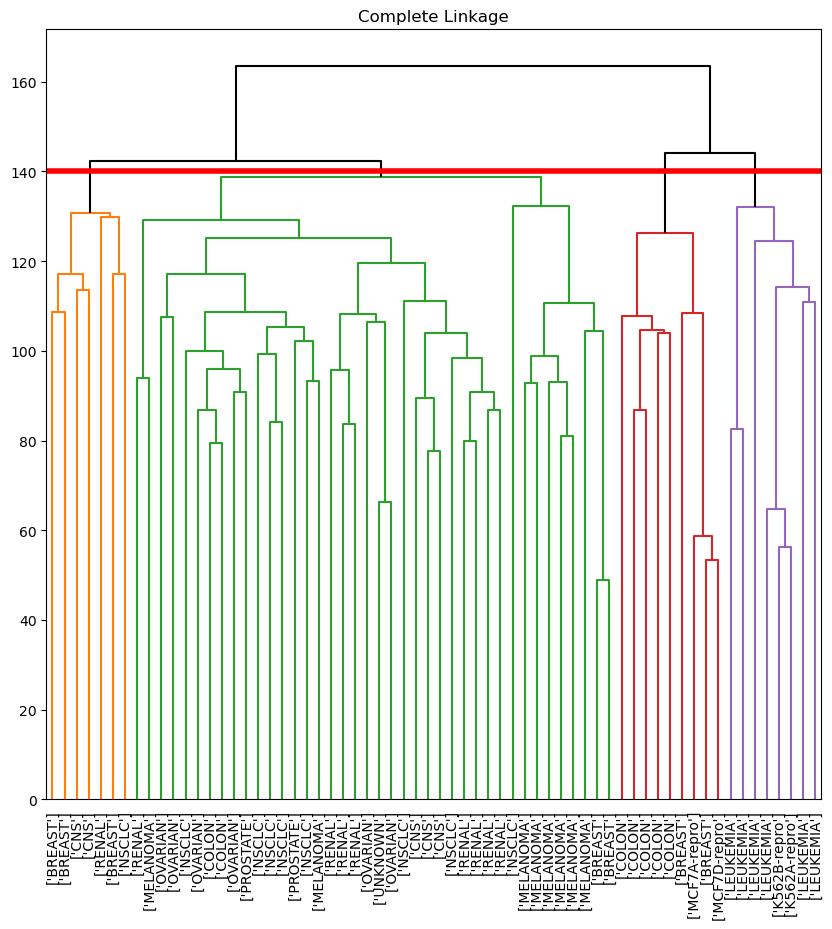

In [52]:
#plot a cut on the dendrogram that produces these four clusters:
fig, ax = plt.subplots(figsize=(10,10))
plot_nci('Complete', ax, cut=140)
ax.axhline(140, c='r', linewidth=4); 

In [55]:
#How do these NCI60 hierarchical clustering results compare to what we get if we perform K-means clustering with K = 4?
nci_kmeans = KMeans(n_clusters=4,
                    random_state=0,
                    n_init=20).fit(nci_scaled)
pd.crosstab(pd.Series(comp_cut, name='HClust'),
            pd.Series(nci_kmeans.labels_, name='K-means'))

K-means,0,1,2,3
HClust,,,,
0,1,20,10,9
1,0,7,0,0
2,8,0,0,0
3,0,0,9,0


In [ ]:
#. First we note that the labels in the two clusterings are arbitrary.

Complete-PCA,0,1,2,3
label,,,,
BREAST,0,5,0,2
CNS,2,3,0,0
COLON,7,0,0,0
K562A-repro,0,0,1,0
K562B-repro,0,0,1,0
LEUKEMIA,2,0,4,0
MCF7A-repro,0,0,0,1
MCF7D-repro,0,0,0,1
MELANOMA,1,7,0,0


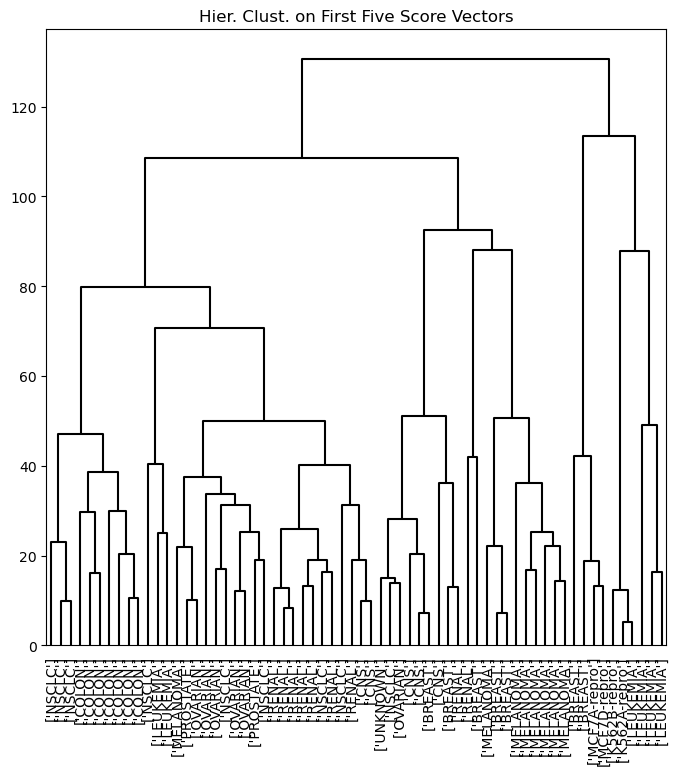

In [56]:
hc_pca = HClust(n_clusters=None,
                distance_threshold=0,
                linkage='complete'
               ).fit(nci_scores[:,:5])
linkage_pca = compute_linkage(hc_pca)
fig, ax = plt.subplots(figsize=(8,8))
dendrogram(linkage_pca,
           labels=np.asarray(nci_labs),
           leaf_font_size=10,
           ax=ax,
           **cargs)
ax.set_title("Hier. Clust. on First Five Score Vectors")
pca_labels = pd.Series(cut_tree(linkage_pca,
                                n_clusters=4).reshape(-1),
                       name='Complete-PCA')
pd.crosstab(nci_labs['label'], pca_labels)

In [ ]:
############12.6 Exercises

In [ ]:
#7.hierarchical clustering.

In [81]:
scaler = StandardScaler()
X = scaler.fit_transform(USArrests)
corD = 1 - np.corrcoef(X, rowvar=False)
seuD = pairwise_distances(X.transpose())**2

(corD)/seuD
#the ratio matrix has a roughly constant

/var/folders/4t/w05mrsdn0r9d85szm0g3kg740000gn/T/ipykernel_1383/4039888030.py:6: RuntimeWarning: divide by zero encountered in divide
  (corD)/seuD
/var/folders/4t/w05mrsdn0r9d85szm0g3kg740000gn/T/ipykernel_1383/4039888030.py:6: RuntimeWarning: invalid value encountered in divide
  (corD)/seuD


array([[ inf, 0.01, 0.01, 0.01],
       [0.01,  nan, 0.01, 0.01],
       [0.01, 0.01,  inf, 0.01],
       [0.01, 0.01, 0.01,  nan]])

In [82]:
#8.a)
scaler = StandardScaler(with_std=True,
                        with_mean=True)
USArrests_scaled = scaler.fit_transform(USArrests)
pcaUS = PCA()
pcaUS.fit(USArrests_scaled)
pcaUS.mean_
pcaUS.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [84]:
#b)
loadings = pcaUS.components_  # ϕ_{jm} from Equation 12.10
X = USArrests_scaled.transpose()

pve=np.zeros(4)
for i in range(4):
    pve[i]=np.sum(np.dot(loadings[i,:],X)**2)/np.sum(X**2)

pve

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [ ]:
#a) and b) get the same results

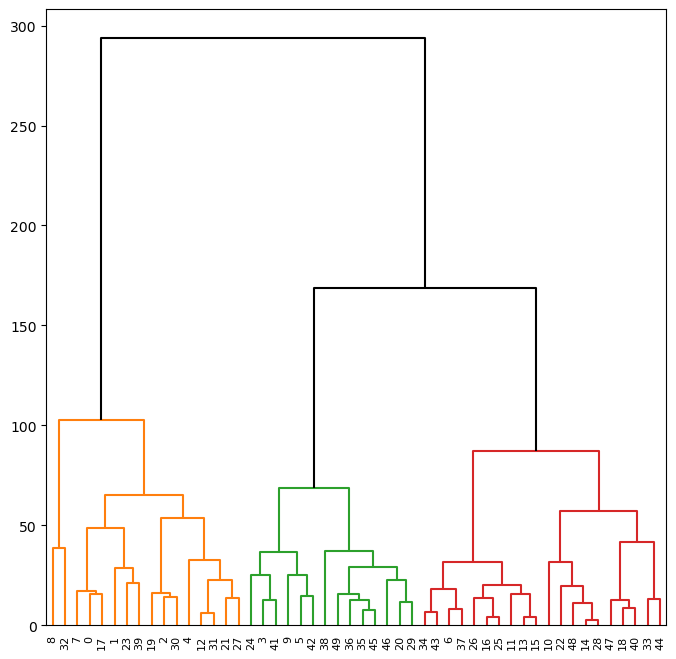

In [108]:
#9.a)b)
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete',
                 metric='euclidean').fit(USArrests)
linkage_comp = compute_linkage(hc_comp)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,ax=ax,color_threshold=120, above_threshold_color='black');

In [120]:
USArrests

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [122]:
comp_cut = cut_tree(linkage_comp, n_clusters=3).T
pd.crosstab(USArrests.index,
            pd.Series(comp_cut.reshape(-1), name='Complete'))

Complete,0,1,2
row_0,,,
Alabama,1,0,0
Alaska,1,0,0
Arizona,1,0,0
Arkansas,0,1,0
California,1,0,0
Colorado,0,1,0
Connecticut,0,0,1
Delaware,1,0,0
Florida,1,0,0


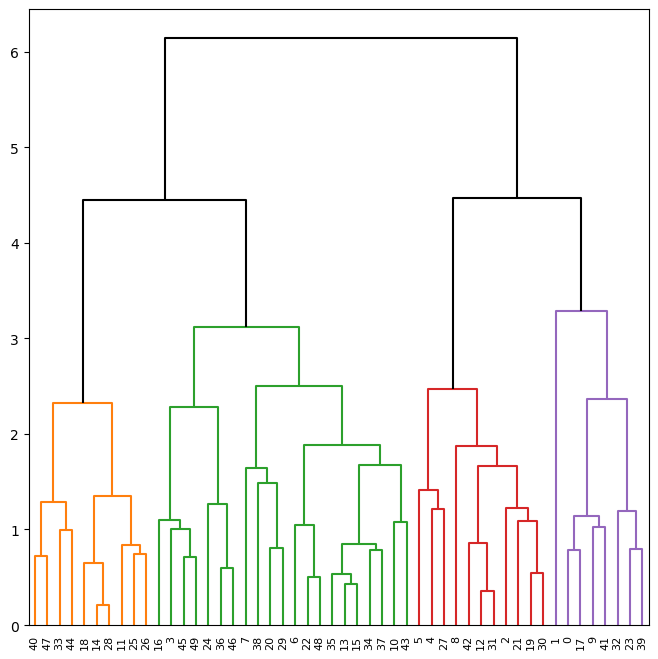

In [115]:
#9.c)d)
hc_comp_scale = HClust(distance_threshold=0,
                       n_clusters=None,
                       linkage='complete',
                       metric='euclidean').fit(USArrests_scaled)
linkage_comp_scale = compute_linkage(hc_comp_scale)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp_scale,ax=ax, above_threshold_color='black');

In [127]:
comp_cut1 = cut_tree(linkage_comp_scale, n_clusters=3).T
pd.crosstab(USArrests.index,
            pd.Series(comp_cut1.reshape(-1), name='Complete'))

Complete,0,1,2
row_0,,,
Alabama,1,0,0
Alaska,1,0,0
Arizona,0,1,0
Arkansas,0,0,1
California,0,1,0
Colorado,0,1,0
Connecticut,0,0,1
Delaware,0,0,1
Florida,0,1,0


In [ ]:
#When variables are not scaled (as in part a), variables with larger variances
#Since USArrests contains variables with different ranges, it is appropriate to scale the data 

In [244]:
#10.
np.random.seed(0);
X = np.random.standard_normal((60,50));
X[0:20] += 2
X[20:40] -= 2
X[40:60] += 0

In [245]:
y = np.array([0]*20 + [1]*20 + [2]*20)

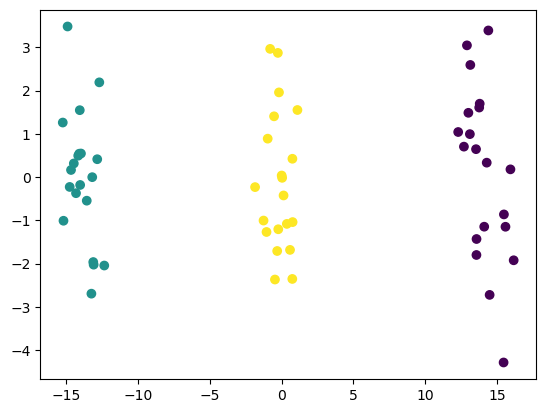

In [247]:
#Perform PCA on the 60 observations and plot the first two principal component score vectors.
pca=PCA()
pca_X=pca.fit_transform(X)

plt.scatter(pca_X[:,0], pca_X[:,1], c=y)

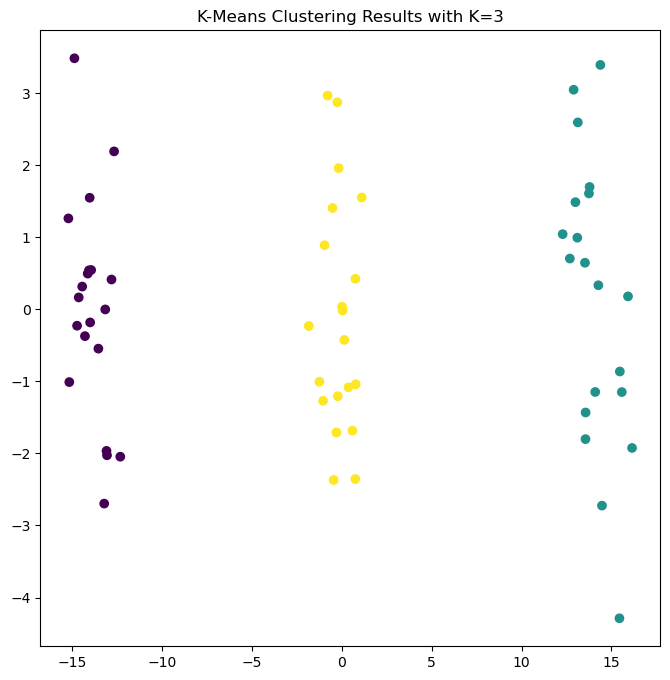

In [230]:
#c)
kmeans = KMeans(n_clusters=3,
                random_state=3,
                n_init=20).fit(X)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(pca_X[:,0], pca_X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=3");

In [231]:
cluster_labels = kmeans.fit_predict(X)
df = pd.DataFrame({'True Labels': y, 'Cluster Labels': cluster_labels})
pd.crosstab(df['True Labels'], df['Cluster Labels'])

Cluster Labels,0,1,2
True Labels,,,
0,0,20,0
1,20,0,0
2,0,0,20


In [ ]:
#K-means clustering will arbitrarily number the clusters

In [232]:
kmeans = KMeans(n_clusters=2,
                random_state=3,
                n_init=20).fit(X)
cluster_labels = kmeans.fit_predict(X)

df = pd.DataFrame({'True Labels': y, 'Cluster Labels': cluster_labels})

pd.crosstab(df['True Labels'], df['Cluster Labels'])

Cluster Labels,0,1
True Labels,,
0,0,20
1,20,0
2,20,0


In [ ]:
#since K = 2, one classe of observations are categoried mistakely  

In [238]:
kmeans = KMeans(n_clusters=4,
                random_state=3,
                n_init=20).fit(X)
cluster_labels = kmeans.fit_predict(X)

df = pd.DataFrame({'True Labels': y, 'Cluster Labels': cluster_labels})

pd.crosstab(df['True Labels'], df['Cluster Labels'])

Cluster Labels,0,1,2,3
True Labels,,,,
0,3,0,0,17
1,0,20,0,0
2,0,0,20,0


In [256]:
#f) 
kmeans = KMeans(n_clusters=3,
                random_state=3,
                n_init=20).fit(pca_X[:,:20])

cluster_labels = kmeans.fit_predict(pca_X)

df = pd.DataFrame({'True Labels': y, 'Cluster Labels': cluster_labels})

pd.crosstab(df['True Labels'], df['Cluster Labels'])

Cluster Labels,0,1,2
True Labels,,,
0,0,20,0
1,20,0,0
2,0,0,20


In [257]:
#K-means clustering on the first two principal component vectors successfully identifies the three classes perfectly.

In [259]:
#g)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3,
                random_state=3,
                n_init=20).fit(X_scaled)

cluster_labels = kmeans.fit_predict(X_scaled)

df = pd.DataFrame({'True Labels': y, 'Cluster Labels': cluster_labels})

pd.crosstab(df['True Labels'], df['Cluster Labels'])

Cluster Labels,0,1,2
True Labels,,,
0,0,20,0
1,20,0,0
2,0,0,20


In [ ]:
#same result with b)

In [406]:
#11.
Boston = load_data("Boston")

In [407]:
def matrix_completion(data, thresh=1e-7, print_result=False):

    data_hat = data.copy()
    r_idx=np.argwhere(np.isnan(data_hat))
    if r_idx.size==0:
        print('Sorry, the inserted matrix is already complete')
        return
    c_index=np.where(np.any(data_hat==np.isnan,axis=0))
    
    data_bar=np.nanmean(data_hat,axis=0)
    data_hat[np.split(r_idx,2,axis=1)[0],np.split(r_idx,2,axis=1)[1]]=data_bar[
        np.split(r_idx,2,axis=1)[1]]

    rel_err = 1
    count = 0
    ismiss = np.isnan(data)
    mssold = np.mean(data_hat[~ismiss]**2)
    mss0 = np.mean(data[~ismiss]**2)
    while rel_err > thresh:
        count += 1
        U, D, V = np.linalg.svd(data_hat)
        L = U[:,:M] * D[None,:M]
        data_app=L.dot(V[:M])    
        data_hat[ismiss] = data_app[ismiss]
        mss = np.mean(((data - data_app)[~ismiss])**2)
        rel_err = (mssold - mss) / mss0
        mssold = mss
        if print_result:
            print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}"
          .format(count, mss, rel_err))
    return data_hat


scaler = StandardScaler()
X_standardized = scaler.fit_transform(Boston)

In [408]:
scaler=StandardScaler()
Boston_scaled=scaler.fit_transform(Boston.loc[:, Boston.columns != "chas"])
df = pd.DataFrame(Boston_scaled, columns = Boston.columns.drop(['chas']))
df1=df.join(Boston['chas'])

In [415]:
df11=df1.to_numpy()
f_omit = 0.05
size=df1.size
label_data=['5%','10%','15%','20%','25%','30%']
indexes=[(l,M) for l in label_data for M in range(1,9)]
dataframes=[]
for j in range(10):
    np.random.seed(j)
    r_idx = np.random.choice(np.arange(df11.shape[0]),int(f_omit*Boston.shape[0]),replace=False)
    c_idx = np.random.choice(np.arange(df11.shape[1]),int(f_omit*Boston.shape[0]),replace=True)
    df11_f5_na = df11.copy()
    df11_f5_na[r_idx, c_idx] = np.nan
    row=[r_idx]
    column=[c_idx]
    data=[df11_f5_na]
    app_error=[]
    for i in range(1,6):
        r_idx=np.delete(np.arange(df1.shape[0]),row[i-1])
        c_idx=np.delete(np.arange(df1.shape[1]),column[i-1])
        row.append(np.random.choice(r_idx,int(f_omit*Boston.shape[0]),replace=False))
        column.append(np.random.choice(c_idx,int(f_omit*Boston.shape[0]),replace=True))
        X=data[i-1].copy()
        X[row,column]=np.nan
        data.append(X)
    combined=[(d,M) for d in data for M in range(1,9)]
     
    for d,M in combined:
        complete_modif=matrix_completion(d,M).copy()
        complete_modif[:,12]=np.where(complete_modif[:,12]<0.5,0,1)
        app_error.append((1/size*np.sum((complete_modif-df11)**2))**(1/2))
    dataframes.append(pd.DataFrame(app_error,index=indexes))
    dataframes[-1].index.name='(Missing fraction , M)'
    dataframes[-1].rename(columns={0:'Rep_'+str(j+1)},inplace=True)

In [416]:
dataframes[0].join(dataframes[1:])

,Rep_1,Rep_2,Rep_3,Rep_4,Rep_5,Rep_6,Rep_7,Rep_8,Rep_9,Rep_10
"(Missing fraction , M)",,,,,,,,,,
"(5%, 1)",0.054628,0.069940,0.057594,0.081803,0.065842,0.088969,0.066072,0.060569,0.083808,0.065350
"(5%, 2)",0.054628,0.069940,0.057594,0.081803,0.065842,0.088969,0.066072,0.060569,0.083808,0.065350
"(5%, 3)",0.054628,0.069940,0.057594,0.081803,0.065842,0.088969,0.066072,0.060569,0.083808,0.065350
"(5%, 4)",0.054628,0.069940,0.057594,0.081803,0.065842,0.088969,0.066072,0.060569,0.083808,0.065350
"(5%, 5)",0.054628,0.069940,0.057594,0.081803,0.065842,0.088969,0.066072,0.060569,0.083808,0.065350
"(5%, 6)",0.054628,0.069940,0.057594,0.081803,0.065842,0.088969,0.066072,0.060569,0.083808,0.065350
"(5%, 7)",0.054628,0.069940,0.057594,0.081803,0.065842,0.088969,0.066072,0.060569,0.083808,0.065350
"(5%, 8)",0.054628,0.069940,0.057594,0.081803,0.065842,0.088969,0.066072,0.060569,0.083808,0.065350
"(10%, 1)",0.077680,0.079349,0.087846,0.101879,0.084274,0.105155,0.090011,0.082083,0.106743,0.070425


In [ ]:
#12.

In [354]:
scaler = StandardScaler()
X = scaler.fit_transform(Boston)

n_omit = 20
np.random.seed(15)
r_idx = np.random.choice(np.arange(X.shape[0]), n_omit, replace=False)
c_idx = np.random.choice(np.arange(X.shape[1]), n_omit, replace=True)
Xna = X.copy()
Xna[r_idx, c_idx] = np.nan

# Step 2 of Algorithm 12.1
def low_rank(X, M=1):
    pca = PCA()
    U = pca.fit_transform(X)  # Scores
    V = pca.components_  # Principal components
    D = np.sqrt(pca.explained_variance_ * (X.shape[0] - 1))  # Singular values
    
    L = U * D[:M]  
    return L.dot(V)

#conduct Step 1 of the algorithm
Xhat = Xna.copy()
Xbar = np.nanmean(Xhat, axis=0)
Xhat[r_idx, c_idx] = Xbar[c_idx]

thresh = 1e-7
rel_err = 1
count = 0
ismiss = np.isnan(Xna) #ismiss is a logical matrix with the same dimensions as Xna
mssold = np.mean(Xhat[~ismiss]**2)   
mss0 = np.mean(Xna[~ismiss]**2)

#approximate Xhat using low_rank()
while rel_err > thresh:
    count += 1
    Xapp = low_rank(Xhat, M=1) #Step 2(a)
    Xhat[ismiss] = Xapp[ismiss] # Step 2(b)
    mss = np.mean(((Xna - Xapp)[~ismiss])**2) # Step 2(c)
    rel_err = (mssold - mss) / mss0
    mssold = mss
    print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}"
          .format(count, mss, rel_err))

Iteration: 1, MSS:3072.583, Rel.Err -3.07e+03


In [358]:
scaler = StandardScaler()
X = scaler.fit_transform(Boston)
data_hat=X.copy()
n_omit = 20
np.random.seed(15)
r_idx=np.argwhere(np.isnan(data_hat))
c_idx=np.where(np.any(data_hat==np.isnan,axis=0))

data_bar=np.nanmean(data_hat,axis=0)
data_hat[np.split(r_idx,2,axis=1)[0],np.split(r_idx,2,axis=1)[1]]=data_bar[np.split(r_idx,2,axis=1)[1]]

# Step 2 of Algorithm 12.1
def low_rank(X, M=1):
    pca = PCA()
    U = pca.fit_transform(X)  # Scores
    V = pca.components_  # Principal components
    D = np.sqrt(pca.explained_variance_ * (X.shape[0] - 1))  # Singular values
    
    L = U * D[:M]  
    return L.dot(V)

thresh = 1e-7
rel_err = 1
count = 0
ismiss = np.isnan(Xna) #ismiss is a logical matrix with the same dimensions as Xna
mssold = np.mean(Xhat[~ismiss]**2)   
mss0 = np.mean(Xna[~ismiss]**2)

#approximate Xhat using low_rank()
while rel_err > thresh:
    count += 1
    Xapp = low_rank(Xhat, M=1) #Step 2(a)
    Xhat[ismiss] = Xapp[ismiss] # Step 2(b)
    mss = np.mean(((Xna - Xapp)[~ismiss])**2) # Step 2(c)
    rel_err = (mssold - mss) / mss0
    mssold = mss
    print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}"
          .format(count, mss, rel_err))

Iteration: 1, MSS:22989719.447, Rel.Err -2.30e+07


In [353]:
def complete_pca(data,thresh=1e-7,print_result=False,M=1):

    pca=PCA()
    data_hat=data.copy()
    #Store the rows and columns indexes of missing values
    r_idx=np.argwhere(np.isnan(data_hat))
    if r_idx.size==0:
        print('Sorry, the inserted matrix is already complete')
        return
    c_index=np.where(np.any(data_hat==np.isnan,axis=0))
    #Step 1 of algorithm 12.1
    data_bar=np.nanmean(data_hat,axis=0)
    data_hat[np.split(r_idx,2,axis=1)[0],np.split(r_idx,2,axis=1)[1]]=data_bar[
        np.split(r_idx,2,axis=1)[1]]
    #Prepare data for step 2
    rel_err = 1
    count = 0
    ismiss = np.isnan(data)
    mssold = np.mean(data_hat[~ismiss]**2)
    mss0 = np.mean(data[~ismiss]**2)
    #Proceed to step 2
    while rel_err > thresh:
        count += 1
        # Step 2(a)
        pca.fit(data_hat)
        data_app=pca.transform(data_hat)[:,:M].dot(pca.components_[:M])
        # Step 2(b)
        data_hat[ismiss] = data_app[ismiss]
        # Step 2(c)
        mss = np.mean(((data - data_app)[~ismiss])**2)
        rel_err = (mssold - mss) / mss0
        mssold = mss
        if print_result:
            print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}".format(count, mss, rel_err))
    return data_hat

In [ ]:
#13.

In [400]:
genes = pd.read_csv("Ch12Ex13.csv", header=None)

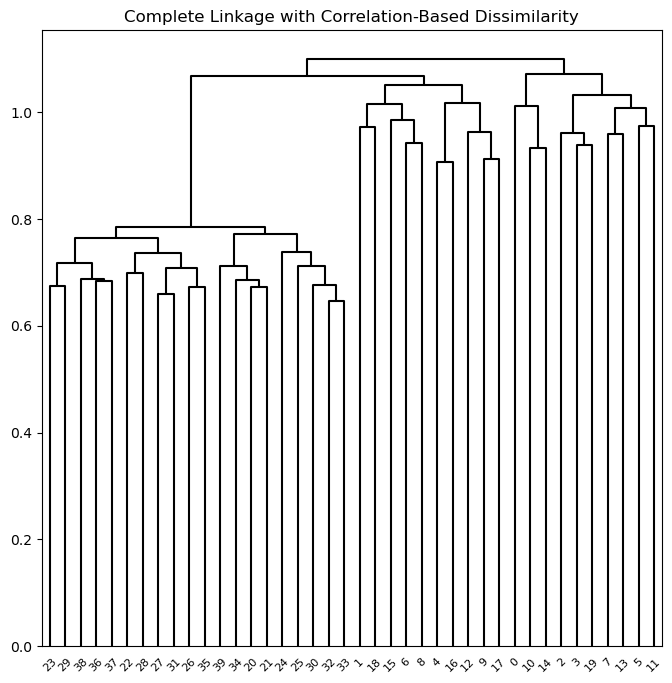

In [393]:
X = genes.transpose()
corD = 1 - np.corrcoef(X)
hc_cor = HClust(linkage='complete',
                distance_threshold=0,
                n_clusters=None,
                metric='precomputed')
hc_cor.fit(corD)
linkage_cor = compute_linkage(hc_cor)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_cor , ax=ax, **cargs)
ax.set_title("Complete Linkage with Correlation-Based Dissimilarity");

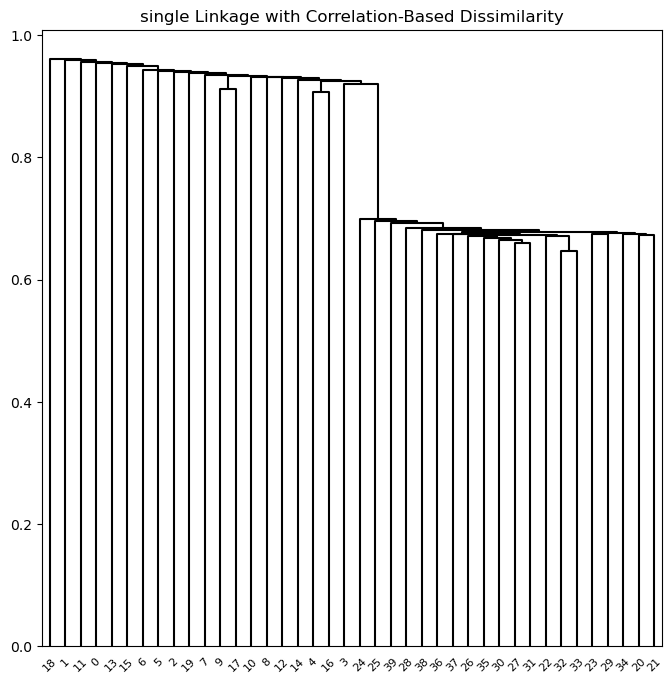

In [401]:
X = genes.transpose()
corD = 1 - np.corrcoef(X)
hc_cor = HClust(linkage='single',
                distance_threshold=0,
                n_clusters=None,
                metric='precomputed')
hc_cor.fit(corD)
linkage_cor = compute_linkage(hc_cor)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_cor , ax=ax, **cargs)
ax.set_title("single Linkage with Correlation-Based Dissimilarity");

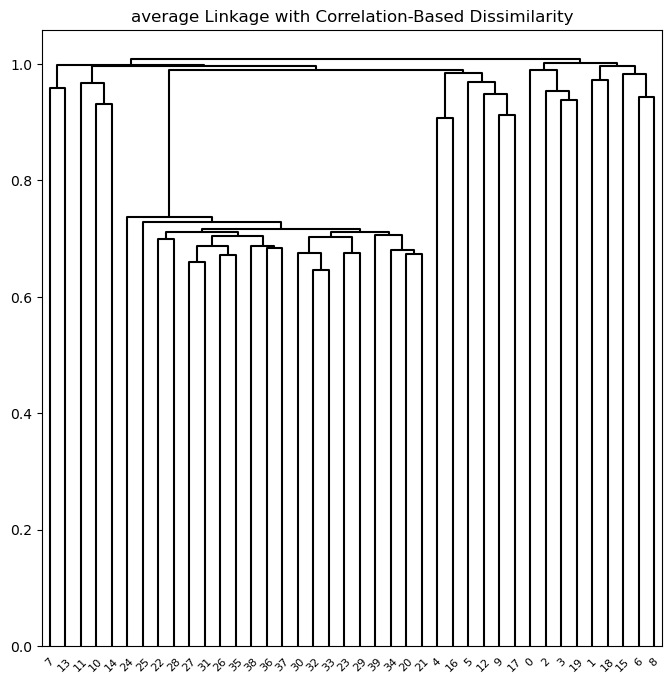

In [402]:
X = genes.transpose()
corD = 1 - np.corrcoef(X)
hc_cor = HClust(linkage='average',
                distance_threshold=0,
                n_clusters=None,
                metric='precomputed')
hc_cor.fit(corD)
linkage_cor = compute_linkage(hc_cor)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_cor , ax=ax, **cargs)
ax.set_title("average Linkage with Correlation-Based Dissimilarity");

In [ ]:
#Do your results depend on the type of linkage used? Yes

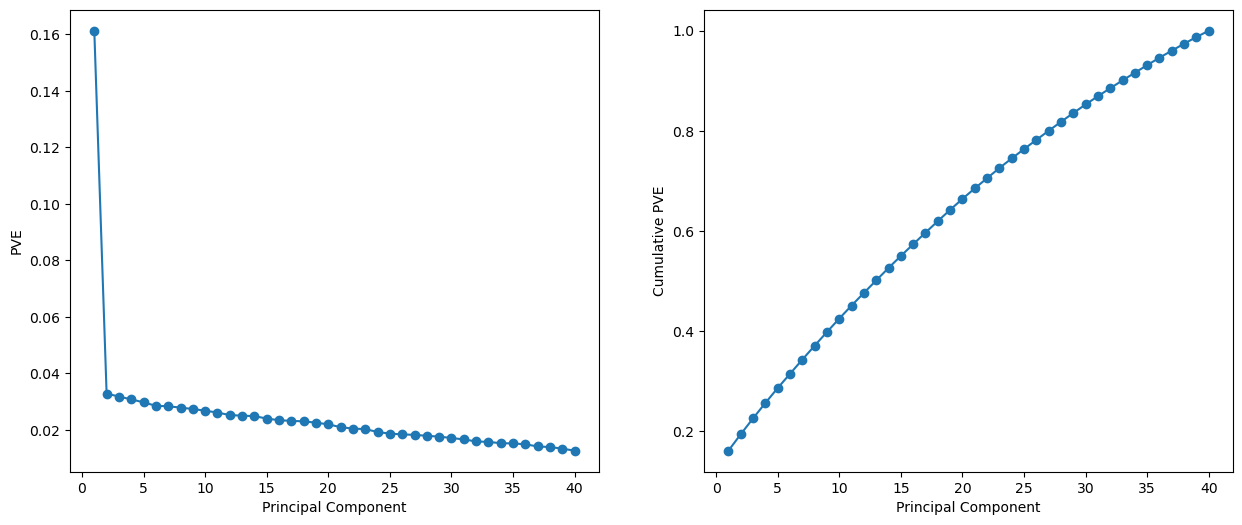

In [395]:
scaler = StandardScaler()
genes_scaled = scaler.fit_transform(genes)
genes_pca = PCA()
genes_scores = genes_pca.fit_transform(genes_scaled)

fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax = axes[0]
ticks = np.arange(genes_pca.n_components_)+1
ax.plot(ticks,
        genes_pca.explained_variance_ratio_,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('PVE')
ax = axes[1]
ax.plot(ticks,
        genes_pca.explained_variance_ratio_.cumsum(),
        marker='o');
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative PVE');

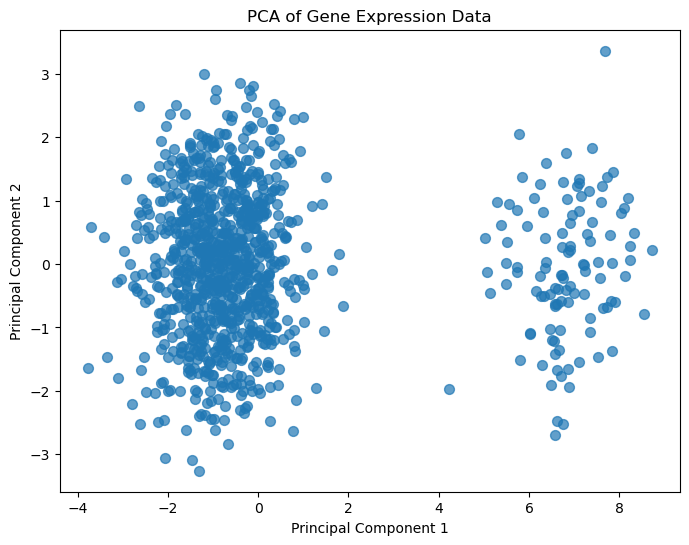

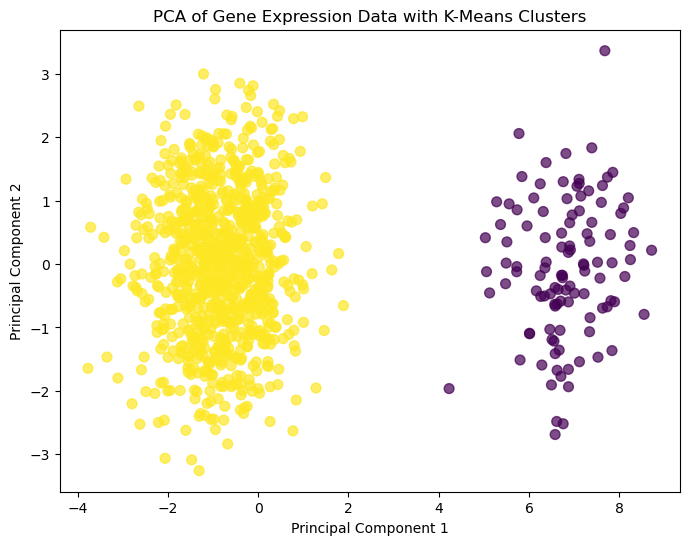

In [405]:
# Perform PCA
pca = PCA(n_components=2)  # We only need the first two components for visualization
genes_pca = pca.fit_transform(genes_scaled)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(genes_pca[:, 0], genes_pca[:, 1], s=50, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Gene Expression Data')
plt.show()

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(genes_scaled)

# Plot PCA with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(genes_pca[:, 0], genes_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Gene Expression Data with K-Means Clusters')
plt.show()


